# What will be the result current Ebola outbreak in the North Kivu, Democratic Republic of the Congo?

### Project 1 Ebola
Sander Miller and Riya Aggarwal


In [706]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# Import functions from the modsim.py module
from modsim import *

### Set up State Variables 
We determined these values by researching the data available on the current Ebola outbreak in North Kivu (http://www.healthmap.org/site/diseasedaily/article/update-current-ebola-outbreak-democratic-republic-congo-91318)

- Susceptible Population (almost all of the population initially) - 5767812 people
- Infected Population  (low initially) - 35 People
- Recovered Population (low initially) - 98 People
    - We decided to group the recovered population and dead population together since neither of those bodies could contract Ebola a second time. In further iterations we could separate out these two populations and graph them against each other. 

In [707]:
init = State (Spop = 5767812,  # Initial Susceptible Population
              Ipop = 35,       # Initial Infected Population
              Rpop = 98)       # Initial Cured/Immune Population

init /= sum (init)             # Convert the population numbers to proportions

,values
Spop,0.999977
Ipop,0.000006
Rpop,0.000017


### Set up System Variables
- Intial Population (p_0)
- Duration (t_0 until t_end)
    - Our model’s timeline is based the number of contacts an infected person would have with a susceptible individual. We picked two for contNum because it gave us an outbreak length of about 22 days, similar to those of previous outbreaks.
- Recovery Rate (Percent of the infected population who recover each day)
    - Note: If an individual is cured, they will no longer be susceptible to the disease, as there is no documented case of anyone catching it twice (https://well.blogs.nytimes.com/2014/11/10/ask-well-immune-to-ebola/)
- Contact Rate (Number of contacts with another individual per day)

In [708]:
init2 = State(S=5767812, I = 35, R = 98)
init2 /= sum(init2)

system = System(init = init2,
                p_0 = 5767945,      # Initial Population of North Kivu
                t_0=0,              # Time Started (day zero)
                t_end=25,           # Time Ended (what we're trying to find)
                recovRate = 0.36,   # Percent of the infected population who recovers each day
                contRate = 2)       # Number of contacts with another susceptible 

,values
init,S 0.999977 I 0.000006 R 0.000017 dtyp...
p_0,5767945
t_0,0
t_end,25
recovRate,0.36
contRate,2


### Plot Results
Takes in the three TimeSeries() for the Susceptible, Infected, and Recovered Populations and plots them with axis labels and a title

In [709]:
def plot_results(S, I, R):
    plot(S, '--', label='Susceptible')
    plot(I, '-', label='Infected')
    plot(R, ':', label='Recovered')
    decorate(title='North Kivu Ebola Outbreak',
             xlabel='Time (days)',
             ylabel='Population (millions)')

### Run Simulation
Runs the simulation from initial time (t_0 to t_end), calling update func each time step (one day)

- Create three TimeSeries for the three categories of populations
- Initialize them at the intial time, and then loop through until t_end
- Set values from the state returned from update_func to the three TimeSeries 
- Return the three TimeSeries to plot

In [710]:
def run_simulation(system, update_func):
    
    S = TimeSeries()
    I = TimeSeries()
    R = TimeSeries()
    
    state = system.init
    S[system.t_0], I[system.t_0], R[system.t_0] = state 
    
    for t in linrange(system.t_0, system.t_end):
        state = update_func(state, t, system)
        S[t+1], I[t+1], R[t+1] = state
        
    return S, I, R

### Update Function 

The update function is called each the simulation in order to simulate one time step (one day) passing

- Follows the SIR Model (Splitting people into Susceptible, Infectious and Recovered)
- The infectious population is the contact rate multiplied by the fraction of infected population and the susceptible population 
- The recovered population is the recovery rate multiplied by the fraction of the infected population 

In [711]:
def update_func(newState, t, system):
    s, i, r = newState;
    
    iPop = system.contRate * s * i
    rPop = system.recovRate * i 
    
    s -= iPop
    i += iPop - rPop
    r += rPop
    
    return State(S=s, I=i, R=r)

In [712]:
#Initial Run of the Update Function 
state = update_func(init, 0, system)

,values
S,0.999965
I,0.000016
R,0.000019


In [713]:
# Run the simulation
S, I, R = run_simulation(system, update_func);

In [714]:
# Multiply the proportions by the initial population and reduce the scale
S *= system.p_0 * (1/1000000)
R *= system.p_0 * (1/1000000)
I *= system.p_0 * (1/1000000)

,values
0,0.000035
1,0.000092
2,0.000244
3,0.000644
4,0.001700
5,0.004486
6,0.011835
7,0.031184
8,0.081914
9,0.213410


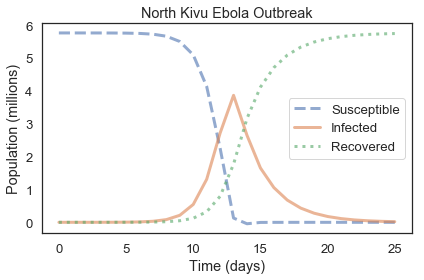

In [715]:
# Plot the results of running the simulation
plot_results(S, I, R)

### Results

In the graph, we can see that the infected population increases rapidly until it reaches it's peak at day 13, before it decreases rapidly, reaching fractional values towards the end of the outbreak. Our susceptible and recovered populations are inversely related, rising and falling opposite to each other.

The outbreak in the Democratic Republic of the Congo is going on right now. Because of this, we used data on the number of cases and deaths as of September 13th, 2018. 

As shown in the table above, the infected popuation reaches less than one person 21 days after beginning, October 4th, 2018, which is when our model predicts the outbreak will end.
